In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np
import seaborn as sns

import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, stats


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'autoev_est'
titulo = 'Autoevaluación de Estadística'
curso = '1BC'


x,y = symbols('x, y', real=True)

%matplotlib inline


IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def analisis_discreto(texto_ejercicio, str_datos, n_ejercicio='_'):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición P70, Q1, Q3, D4',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'h_i':np.unique(datos, return_counts=True)[1]/len(datos), 'H_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \resizebox {0.5\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % n_ejercicio)
    
    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
1,2,2,0.095238,0.095238,9.523810,9.523810
2,3,5,0.142857,0.238095,14.285714,23.809524
3,4,9,0.190476,0.428571,19.047619,42.857143
4,4,13,0.190476,0.619048,19.047619,61.904762
5,3,16,0.142857,0.761905,14.285714,76.190476
6,1,17,0.047619,0.809524,4.761905,80.952381
7,2,19,0.095238,0.904762,9.523810,90.476190
8,1,20,0.047619,0.952381,4.761905,95.238095
12,1,21,0.047619,1.000000,4.761905,100.000000


{'media': 4.333333333333333,
 'mediana': 4.0,
 'moda': ModeResult(mode=array([3]), count=array([4]))}

{'P70': 5.0, 'Q1': 3.0, 'Q3': 5.0, 'D4': 3.0}

{'rango': 11,
 'varianza': 6.507936507936508,
 'desviación típica': 2.55106575923407,
 'coeficiente variación': 0.588707482900170}

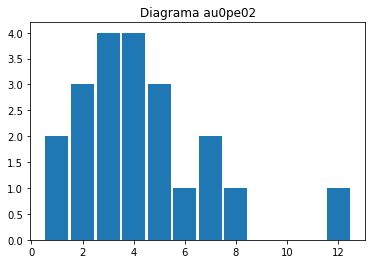

In [3]:
df_ejercicios = pd.DataFrame()

lista_problemas = [
                  #['pe01',"""Se realiza una encuesta a un grupo de 20 personas acerca del número de hermanos que tienen, obteniéndose los siguientes resultados:"""
                  # ,r"0 1 2 3 5 2 0 1 1 1 2 2 1 0 0 0 0 1 2 3"],
                  ['au0pe02',"""Se realiza una encuesta a un grupo de 21 personas acerca del número de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:"""
                   ,r"4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 12 5 4"],
                
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



In [4]:
# Página 90 ejercicio 6

texto_ejercicio = r"""La medida del tórax de una muestra de varones se distribuye: """



n_ejercicio = 'au1p090e06'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[79.5,85.5,4],[85.5,91.5,8],[91.5,97.5,12],[97.5,103.5,20],[103.5,109.5,9],[109.5,115.5,5],[115.5,121.5,2]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))

tabla.append(totales,ignore_index=True)

# pregunta 1
enunciado_latex.append("Haz una tabla de frecuencias")
enunciado.append("Haz una tabla de frecuencias")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

# pregunta 2

enunciado_latex.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")
enunciado.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")

media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}
solucion.append({'media':media, 'varianza': var, 'desviación típica': desv_tip
                , 'coeficiente de variación': desv_tip/abs(media)})

    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**La medida del tórax de una muestra de varones se distribuye: \\\begin{tabular}{rlr}
\hline
    & Duración                    &   Cantidad \\
\hline
  0 & $\left[79.5, 85.5\right)$   &          4 \\
  1 & $\left[85.5, 91.5\right)$   &          8 \\
  2 & $\left[91.5, 97.5\right)$   &         12 \\
  3 & $\left[97.5, 103.5\right)$  &         20 \\
  4 & $\left[103.5, 109.5\right)$ &          9 \\
  5 & $\left[109.5, 115.5\right)$ &          5 \\
  6 & $\left[115.5, 121.5\right)$ &          2 \\
\hline
\end{tabular}**

In [5]:
# Página 90 ejercicio 7

texto_ejercicio = r"""En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:"""



n_ejercicio = 'au2p090e07'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[15,23,3],[23,31,4],[31,39,5],[39,47,8],[47,55,10],[55,63,12],[63,71,15],[71,79,12],[79,87,6]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))

tabla.append(totales,ignore_index=True)


enunciado_latex.append("Haz una tabla de frecuencias")
enunciado.append("Haz una tabla de frecuencias")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

enunciado_latex.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")
enunciado.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")

media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}
solucion.append({'media':media, 'varianza': var, 'desviación típica': desv_tip
                , 'coeficiente de variación': desv_tip/abs(media)})

# pregunta 3

enunciado_latex.append("La edad mas frecuente de los pacientes")
enunciado.append("La edad mas frecuente de los pacientes")


fila_moda = tabla.loc[tabla.f_i==tabla.f_i.max()]
ind = fila_moda.index[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    f0 = 0
else:
    f0 = tabla.iloc[ind-1].f_i
    
if ind == max(tabla.index) :
    f2 = f0
else:
    f2 = tabla.iloc[ind+1].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

moda = L + C*(f-f0)/((f-f0)+(f-f2))

print(moda)

solucion.append({'Intervalo modal':r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+"$" ,'moda': moda})
#solucion.append(r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+r"$")

# pregunta 4

enunciado_latex.append("El percentil 47")
enunciado.append("El percentil 47")

perc = 47
ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

solucion.append({r'k':k, r'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'percentil':percentil})

#pregunta 4

enunciado_latex.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")
enunciado.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")

valor = 60
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})

print(solve(Eq(valor,L+C*(x*N/100-F)/f))[0])


solucion.append({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:\\\begin{tabular}{rlr}
\hline
    & Duración              &   Cantidad \\
\hline
  0 & $\left[15, 23\right)$ &          3 \\
  1 & $\left[23, 31\right)$ &          4 \\
  2 & $\left[31, 39\right)$ &          5 \\
  3 & $\left[39, 47\right)$ &          8 \\
  4 & $\left[47, 55\right)$ &         10 \\
  5 & $\left[55, 63\right)$ &         12 \\
  6 & $\left[63, 71\right)$ &         15 \\
  7 & $\left[71, 79\right)$ &         12 \\
  8 & $\left[79, 87\right)$ &          6 \\
\hline
\end{tabular}**

67.0
{'k': 47, 'N': 75.0, 'L_i': 55.0, 'f_i': 12.0, 'F_{i-1}': 30.0, 'C_i': 8.0}
{'valor': 60, 'N': 75.0, '$L_i$': 55.0, '$f_i$': 12.0, '$F_{i-1}$': 30.0, '$C_i$': 8.0, 'Porcentaje': 50.0000000000000}
50.0000000000000


**La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido\\\begin{tabular}{lrrrrrr}
\hline
                      &   0 &   1 &   2 &   3 &   4 &   5 \\
\hline
 Temperatura (grados) &  10 &  12 &  14 &  15 &  17 &  20 \\
 Gasto (euros)        & 150 & 120 & 102 &  90 &  50 &  18 \\
\hline
\end{tabular}**

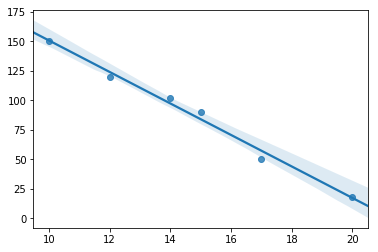

In [6]:
# Página 93 ejercicio 5

texto_ejercicio = r"""La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido"""



n_ejercicio = 'au3p093e05'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[10  , 150 ],
       [12 , 120],
       [14 , 102],
       [15  , 90],
       [17  , 50],
       [20  , 18],
       ])


tabla_enunciado = pd.DataFrame({'Temperatura (grados)':datos[:,0],'Gasto (euros)':datos[:,1]}).T
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

## Manipulación de datos 


tabla = pd.DataFrame({r'x': datos[:,0],'y': datos[:,1],
                      'xy': datos[:,0]*datos[:,1],'x2':datos[:,0]**2,'y2':datos[:,1]**2})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[tabla.x.sum(),tabla.y.sum(),tabla.xy.sum(),tabla.x2.sum(),
                         tabla.y2.sum()]],columns=list(tabla.columns))
totales

medias = pd.DataFrame([[tabla.x.mean(),tabla.y.mean(),tabla.xy.mean(),tabla.x2.mean(),
                         tabla.y2.mean()]],columns=list(tabla.columns))
medias

tabla_agregada =tabla.append(totales,ignore_index=True).append(medias,ignore_index=True)

tabla_agregada


# pregunta 1
enunciado_latex.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
enunciado.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

# pregunta 2

enunciado_latex.append("Calcula el gasto medio")
enunciado.append("Calcula el gasto medio")

media = np.mean(datos[:,1])
media

solucion.append({'media':media})

# pregunta  3

enunciado_latex.append("Halla el coeficiente de correlación lineal e interprétalo")
enunciado.append("Halla el coeficiente de correlación lineal e interprétalo")


pendiente, ordenada, coefcorr = stats.linregress(datos)[:3]

solucion.append({'media de x': np.mean(datos[:,0]),
                 'desviación de x' : np.std(datos[:,0]),
                 'media de y' : np.mean(datos[:,1]),
                 'desviación de y' : np.std(datos[:,1]),                 
                 'covarianza': np.cov(datos[:,0],datos[:,1],bias=True)[0][1],
                 'coeficiente de correlación': coefcorr})

# pregunta  4

valor_a_estimar = 8

enunciado_latex.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))
enunciado.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))

f1 = sns.regplot(datos[:,0],datos[:,1]).figure
f1.savefig(str(n_ejercicio)+".pgf")



(pendiente*x+ordenada).subs(x,valor_a_estimar)

solucion.append(r"$"+ latex(Eq(y,pendiente*x+ordenada))+r"$ \\"+
                r"\resizebox {0.5\textwidth}{!}{\input{"+str(n_ejercicio)+r".pgf}}\\"+
                r"La estimación para x=" + latex(valor_a_estimar)+r" es: "+latex((pendiente*x+ordenada).subs(x,valor_a_estimar)))
   

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


In [7]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
1,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \resizebox {0.5\textwidth}{!}{\includegraph...,Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 4.333333333333333, 'mediana': 4.0, '...",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 5.0, 'Q1': 3.0, 'Q3': 5.0, 'D4': 3.0}",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 11, 'varianza': 6.507936507936508, '...",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
5,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,La medida del tórax de una muestra de varones ...,1BC,Autoevaluación de Estadística,au1p090e06,1,1,1,False,False
6,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 99.0, 'varianza': 73.95000000000073,...",La medida del tórax de una muestra de varones ...,1BC,Autoevaluación de Estadística,au1p090e06,1,1,1,False,False
7,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
8,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 57.4, 'varianza': 290.13333333333367...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
9,La edad mas frecuente de los pacientes,La edad mas frecuente de los pacientes,"{'Intervalo modal': '$\left[63.0, 71.0\right)$...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False


In [8]:
df_ejercicios.to_csv('autoeva_estadistica.csv', index = False)

In [9]:
df_ejercicios = pd.read_csv('autoeva_estadistica.csv', index_col= None)

In [10]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **au0pe02

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
1,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \resizebox {0.5\textwidth}{!}{\includegraph...,Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 4.333333333333333, 'mediana': 4.0, '...",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 5.0, 'Q1': 3.0, 'Q3': 5.0, 'D4': 3.0}",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 11, 'varianza': 6.507936507936508, '...",Se realiza una encuesta a un grupo de 21 perso...,1BC,Autoevaluación de Estadística,au0pe02,1,1,1,False,False


**Ejercicio: **au1p090e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
5,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,La medida del tórax de una muestra de varones ...,1BC,Autoevaluación de Estadística,au1p090e06,1,1,1,False,False
6,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 99.0, 'varianza': 73.95000000000073,...",La medida del tórax de una muestra de varones ...,1BC,Autoevaluación de Estadística,au1p090e06,1,1,1,False,False


**Ejercicio: **au2p090e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
7,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
8,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 57.4, 'varianza': 290.13333333333367...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
9,La edad mas frecuente de los pacientes,La edad mas frecuente de los pacientes,"{'Intervalo modal': '$\\left[63.0, 71.0\\right...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
10,El percentil 47,El percentil 47,"{'k': 47, 'N': 75.0, '$L_i$': 55.0, '$f_i$': 1...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False
11,¿Qué porcentaje de pacientes tenían una edad s...,¿Qué porcentaje de pacientes tenían una edad s...,"{'valor': 60, 'N': 75.0, '$L_i$': 55.0, '$f_i$...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística,au2p090e07,1,1,1,False,False


**Ejercicio: **au3p093e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
12,Haz una tabla de frecuencias con los datos que...,Haz una tabla de frecuencias con los datos que...,\begin{tabular}{rrrrrr}\n\hline\n & x & ...,La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística,au3p093e05,1,1,1,False,False
13,Calcula el gasto medio,Calcula el gasto medio,{'media': 88.33333333333333},La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística,au3p093e05,1,1,1,False,False
14,Halla el coeficiente de correlación lineal e i...,Halla el coeficiente de correlación lineal e i...,"{'media de x': 14.666666666666666, 'desviación...",La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística,au3p093e05,1,1,1,False,False
15,Estima el gasto medio por habitante de una ciu...,Estima el gasto medio por habitante de una ciu...,$y = - 13.3473684210526 x + 284.094736842105$ ...,La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística,au3p093e05,1,1,1,False,False
